# Задача классификации

### Датасет

Данный датасет содержит информацию о демографических характеристиках и экономическом положении людей, используемую для предсказания уровня дохода (больше или меньше $50K в год). Поля включают возраст, уровень образования, занятость, семейное положение, расу, пол, страну рождения, а также показатели, связанные с рабочей деятельностью и капиталом. 

Актуальность задачи: прогнозируя доход, мы можем более взвешенно выдавать людям кредиты или ипотеки

* age - Возраст человека.

* workclass - Тип занятости человека (государственная работа, частный сектор, самозанятость и т. д.).

* fnlwgt - Весовая величина, представляющая количество людей в генеральной совокупности, которых представляет данная запись. Используется в выборке для оценки распределения.

* education - Уровень образования человека.

* educational-num - Кодированный числовой эквивалент уровня образования.

* marital-status - Семейное положение человека.

* occupation - Профессия или тип работы.

* relationship - Тип семейных отношений (например, муж, жена, не в браке).

* race - Расовая принадлежность.

* gender - Пол человека.

* capital-gain - Прибыль от капитала (например, от продажи акций или имущества).

* capital-loss - Потери капитала (например, от продажи имущества с убытком).

* hours-per-week - Количество часов, которые человек работает в неделю.

* native-country - Страна рождения или гражданства.

* income - Категориальная цель — уровень дохода, обычно представлен как ">50K" или "<=50K".


### Метрики

Для оценки моделей я выбрал метрики `accuracy` и `f1`

**Accuracy** (доля правильных предсказаний) хорошо отражает общую производительность модели, если классы в целевой переменной (income) сбалансированы.
В данном случае целевая метка делится на два класса ("<=50K" и ">50K"), и accuracy позволяет понять, насколько модель правильно классифицирует оба класса в совокупности.

Минус Accuracy - если классы несбалансированы (например, больше записей с "<=50K"), accuracy может быть недостаточно информативной, так как модель может просто чаще предсказывать более распространенный класс. Поэтому требуется дополнительная метрика.


**F1-score** учитывает как точность (precision), так и полноту (recall), что делает его идеальной метрикой для оценки моделей, особенно если классы несбалансированы.

Precision показывает, сколько из предсказанных позитивных случаев модель правильно классифицировала.
Recall отражает, какую долю настоящих позитивных случаев модель смогла найти.
F1-score объединяет эти две метрики, обеспечивая баланс между ними.

**Особенность для данного датасета:**
В задачах, где один из классов важнее (например, ">50K" для оценки высокого дохода), F1-score помогает лучше оценить производительность модели на этом классе, даже если распределение классов в данных неравномерное.

### Итог:
Использование accuracy позволяет получить общую оценку качества модели, тогда как F1-score помогает глубже понять, как модель справляется с более важным или менее представленным классом. Вместе они дают сбалансированное представление о производительности модели на данном датасете

In [95]:
%pip install matplotlib seaborn numpy pandas scikit-learn kagglehub imblearn

Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd

data = pd.read_csv("./adult.csv") # https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [98]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## KNN
### Создание бейзлайна и оценка качества

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd

In [100]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

features = ['workclass','race','gender', 'occupation', 'native-country', 'education', 'relationship', 'marital-status', 'income']
label_encoder = LabelEncoder()

for col in features:
    data[col] = label_encoder.fit_transform(data[col])

In [101]:
X = data.drop(['income'], axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
from sklearn.pipeline import Pipeline


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=2))
])


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("KNN result")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

KNN result
Accuracy: 0.8205548162555021
F1: 0.5203830369357045


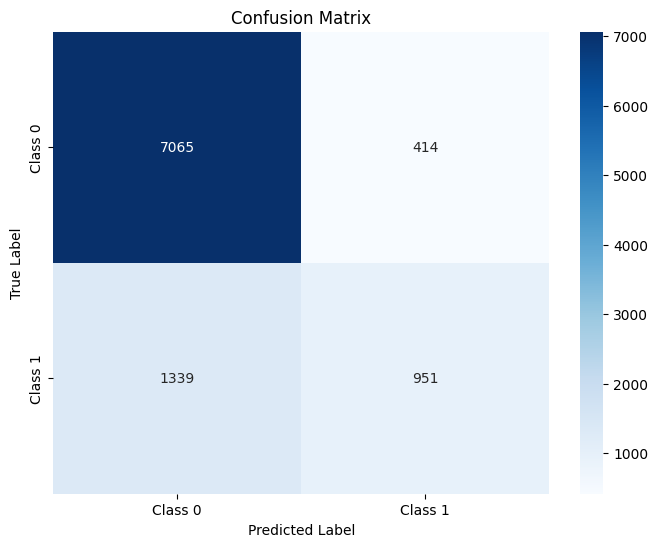

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
labels = ["Class 0", "Class 1"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Улучшение бейзлайна
Исследуем датасет и визуализируем некоторую информацию

In [104]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

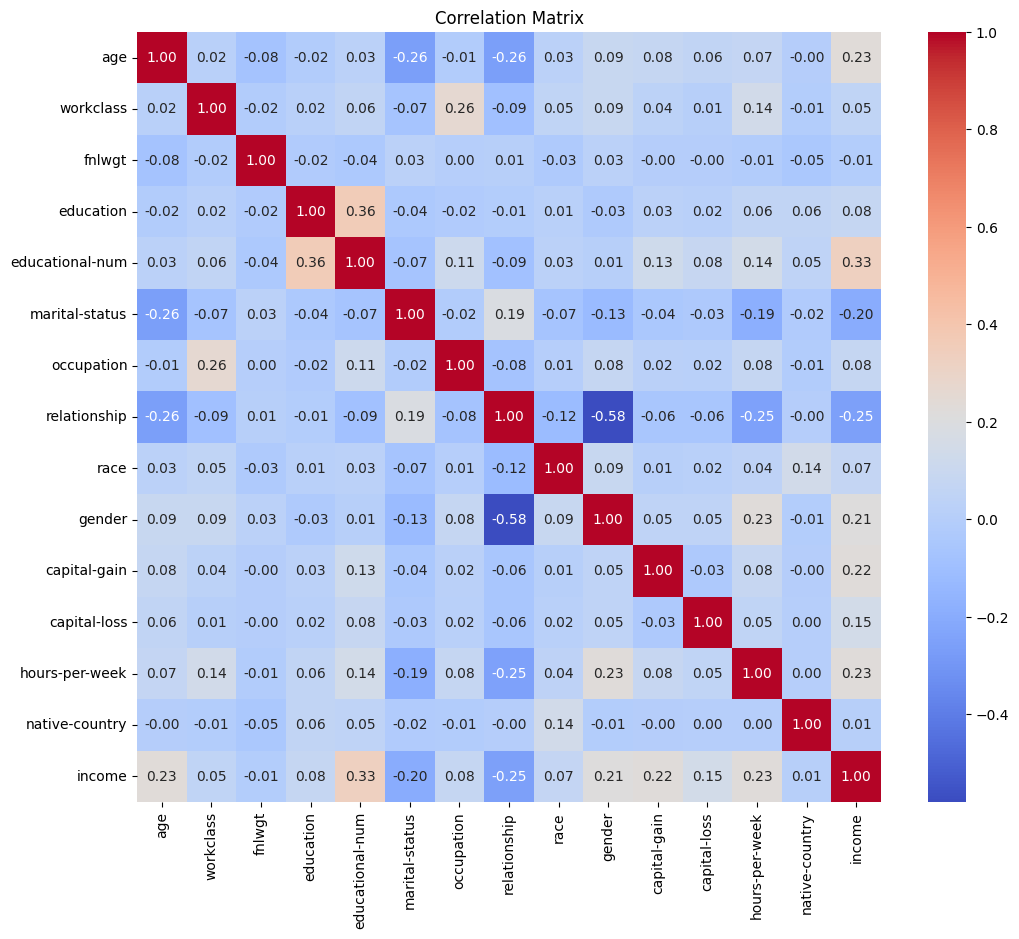

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

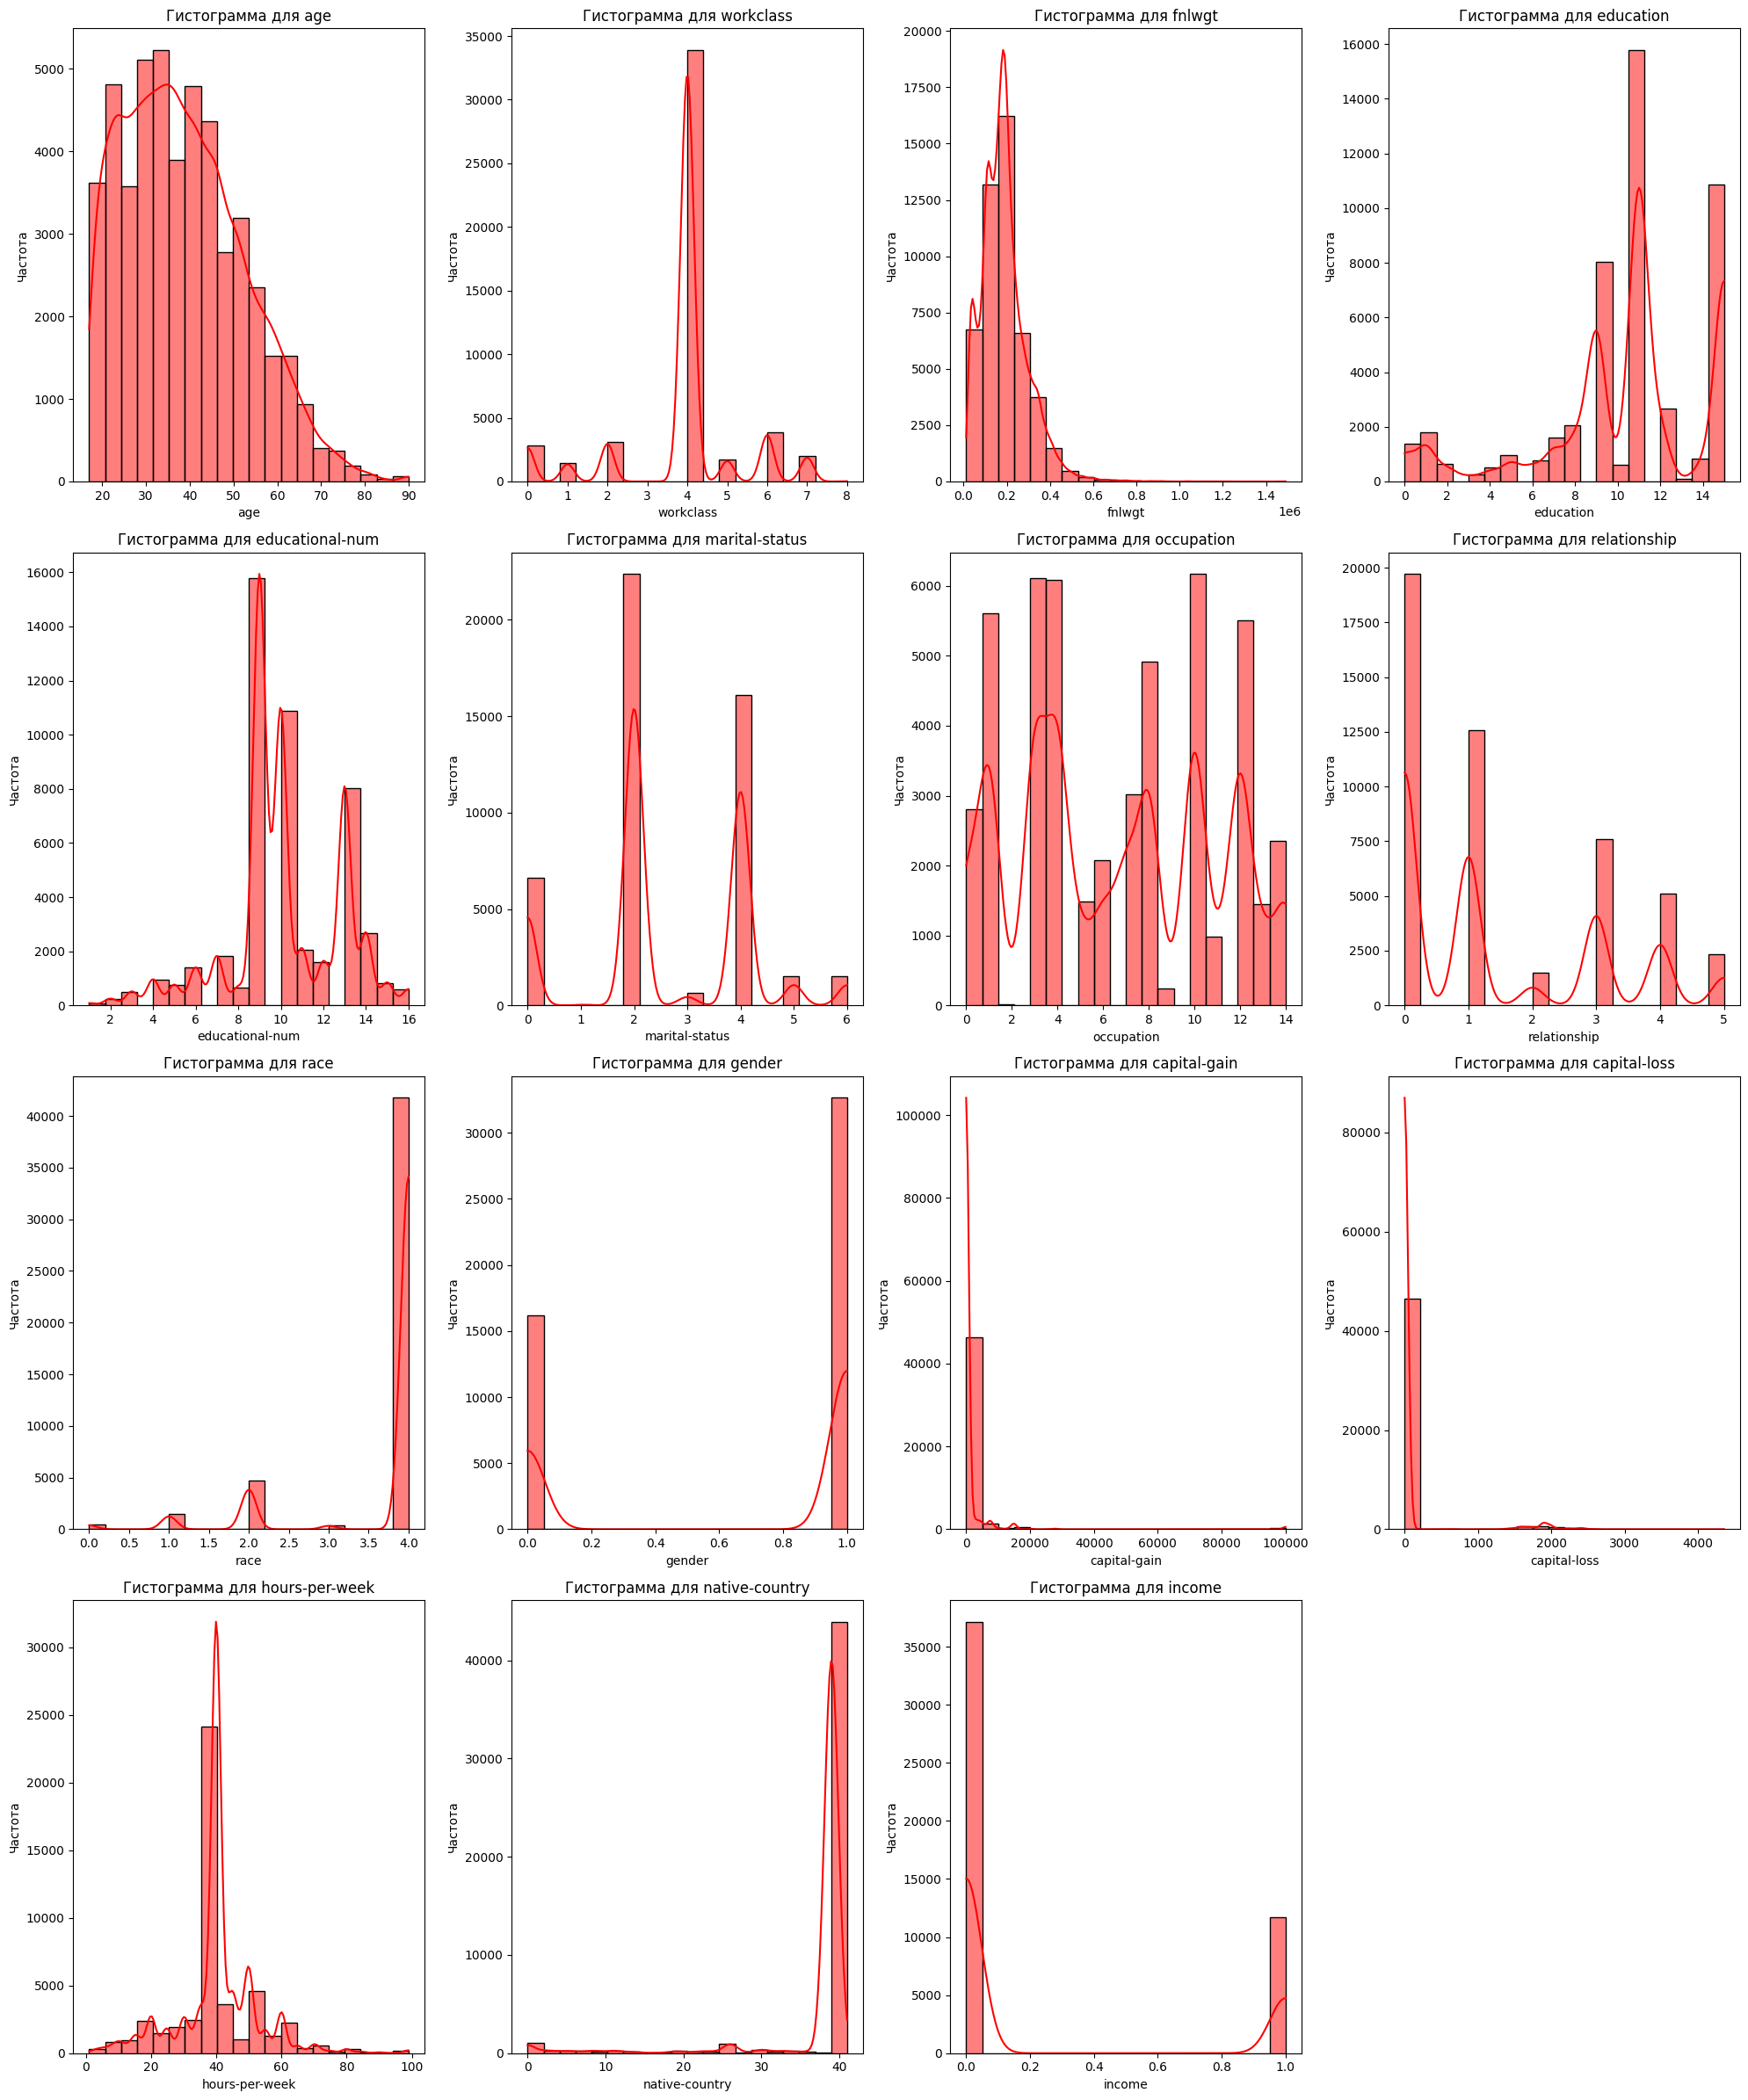

In [106]:
numerical_columns = data.select_dtypes(include=["number"]).columns
n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()
for idx, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, ax=axes[idx], color='red', bins=20)
    axes[idx].set_title(f'Гистограмма для {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

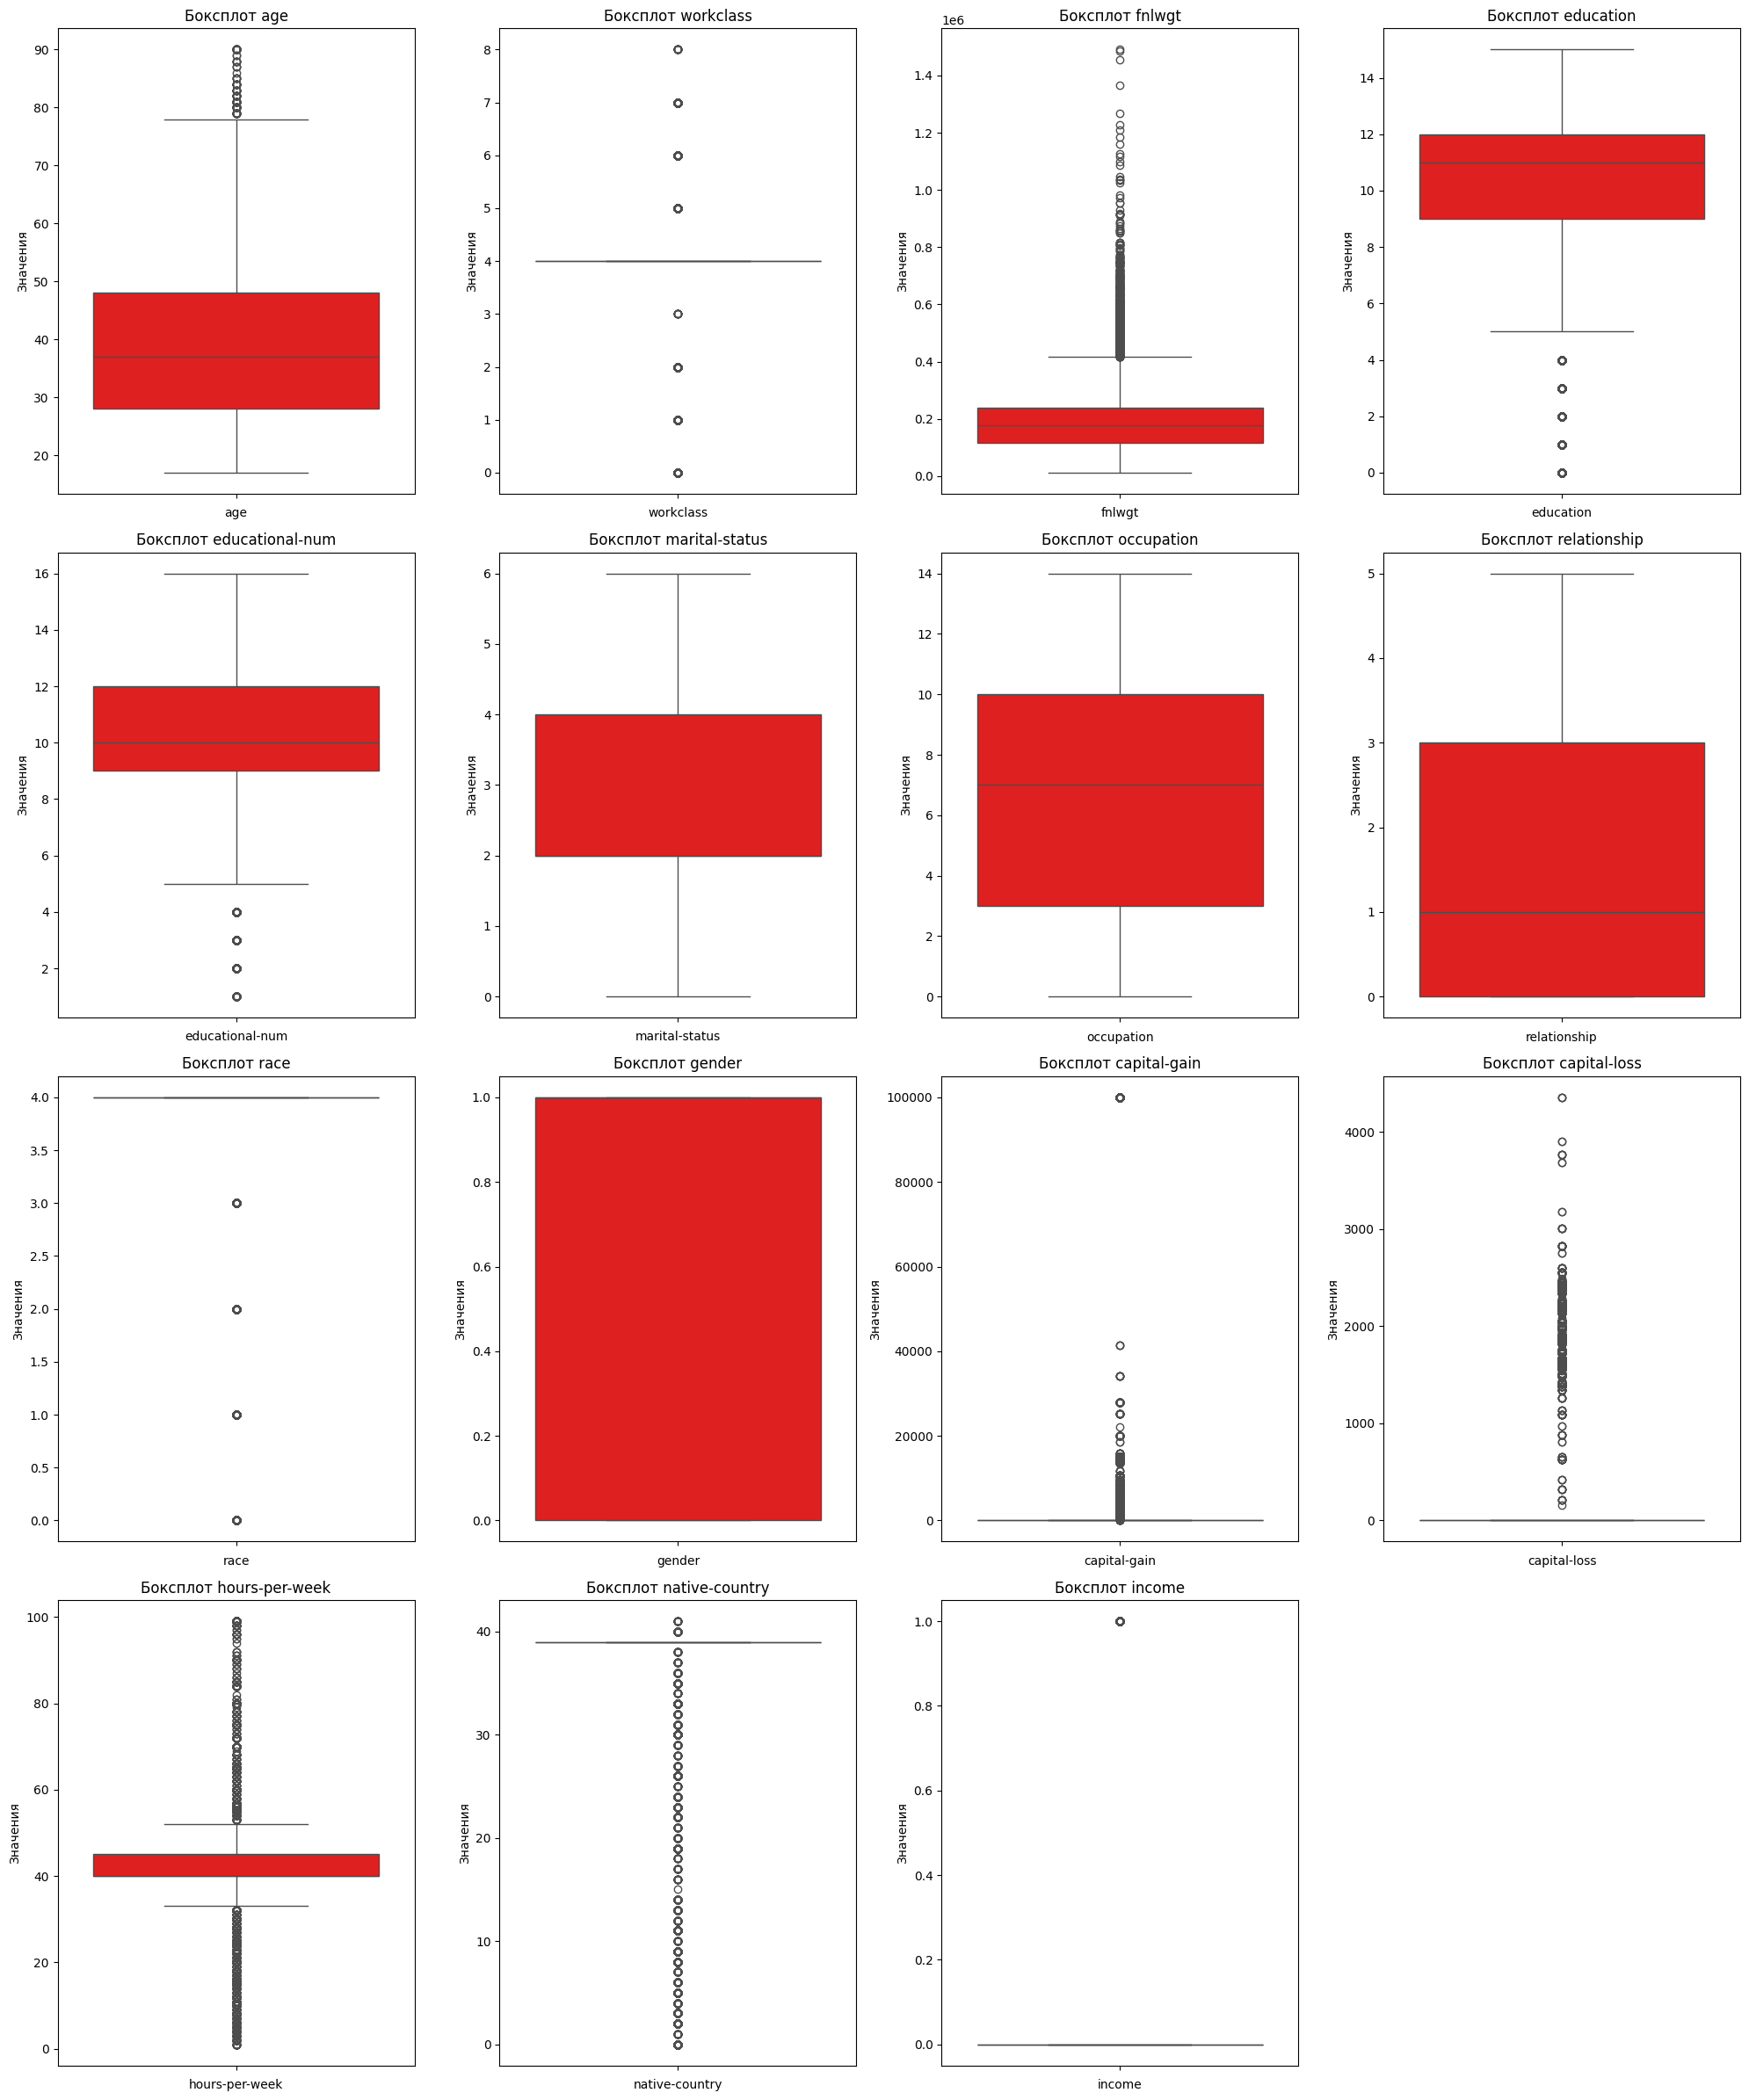

In [107]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()
numerical_columns = data.select_dtypes(include=['number']).columns
for idx, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=axes[idx], color='red')
    axes[idx].set_title(f'Боксплот {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Значения')

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

C целевой переменной у нас отрицательная корреляция с `relationship` и `martical-status `

запустим GridSearchCV для перебора гиперпараметров

In [108]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


param_grid = {
    'classifier__n_neighbors': range(2, 10),
}

grid_search = GridSearchCV(pipeline, param_grid, cv=8, scoring=make_scorer(accuracy_score))
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая точность на кросс-валидации: {best_score}")

y_pred = grid_search.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Лучшие параметры: {'classifier__n_neighbors': 9}
Лучшая точность на кросс-валидации: 0.8321856633780891
Accuracy: 0.8426655747773569
F1: 0.6429732868757259


### Имлементация алгоритмов машинного обучения

In [109]:
from scipy.spatial import distance

class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X.values:
            distances = distance.cdist(self.X_train.values, [x], metric='euclidean').ravel()
            k_indices = distances.argsort()[:self.k]
            k_labels = self.y_train.iloc[k_indices]
            most_common = k_labels.mode()[0]
            predictions.append(most_common)
        return np.array(predictions)


In [110]:
knn = KNNClassifier(k=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

KNN Results:
Accuracy: 0.7938376497082609
F1: 0.3951951951951952


### Выводы

Ожидаемо, оказалось, что библиотечная реализация показывает результаты лучше, чем моя реализация.

## Логистическая и линейная регрессия
### Создание бейзлайна и оценка качества

In [111]:
from sklearn.linear_model import LogisticRegression


logReg = LogisticRegression(max_iter=1000, random_state=42)
logReg.fit(X_train,y_train)

y_pred = logReg.predict(X_test)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")


Logistic Regression Results:
Accuracy: 0.8083734261439247
F1: 0.47592385218365063


/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Добавим полиномиальные признаки

In [112]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LogisticRegression(random_state=42, max_iter=1000)
model_poly.fit(X_train_poly, y_train)

# Оценка улучшенной модели
y_pred_poly = model_poly.predict(X_test_poly)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_poly}")
print(f"F1: {f1_poly}")

Logistic Regression Results:
Accuracy: 0.8154365851161839
F1: 0.5241488519398259


/Users/yikataev/Study/ai-da/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Наши показатели немного улучшились

### Собственная реализация

In [113]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization_param=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_param = regularization_param
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
        num_samples, num_features = X.shape
        self.weights = np.random.randn(num_features) * 0.01  # Случайная инициализация
        self.bias = 0

        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)
            
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y)) + (self.regularization_param / num_samples) * self.weights
            db = (1 / num_samples) * np.sum(predictions - y)
           
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Масштабируем тестовые данные
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in predictions]

In [114]:
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
X_train_my = np.array(X_train, dtype=np.float64)
y_train_my = np.array(y_train, dtype=np.float64)

model.fit(X_train_my, y_train_my)

y_pred = model.predict(np.array(X_test, dtype=np.float64))

accuracy_poly = accuracy_score(y_test, y_pred)
f1_poly = f1_score(y_test, y_pred)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_poly}")
print(f"F1: {f1_poly}")

Logistic Regression Results:
Accuracy: 0.8211690039922203
F1: 0.5282203618687551


Моя реализация оказалась даже более точной, чем библиотечная. Это довольно удивительно

## Решающее дерево
### Создание бейзлайна и оценка качества

In [115]:
from sklearn.tree import DecisionTreeClassifier


model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)

y_pred_baseline = model_tree.predict(X_test)

print("Decision tree results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Decision tree results:
Accuracy: 0.8211690039922203
F1: 0.5282203618687551


### Улучшение бейзлайна

In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)


y_pred_best = best_model.predict(X_test)
print("Улучшенная модель:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("F1:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred_best))

Лучшие параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Улучшенная модель:
Accuracy: 0.8623195823523391
F1: 0.5282203618687551
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7479
           1       0.73      0.65      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



После подбора гиперпараментров, мы улучшили accuracy, но метрика f1 особо не изменилась

Выведем графический вид нашего дерева.

Структура лучшего дерева:
|--- relationship <= 0.50
|   |--- educational-num <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- educational-num <= 8.50
|   |   |   |   |--- hours-per-week <= 43.50
|   |   |   |   |   |--- capital-loss <= 1794.00
|   |   |   |   |   |   |--- educational-num <= 5.50
|   |   |   |   |   |   |   |--- fnlwgt <= 34337.50
|   |   |   |   |   |   |   |   |--- fnlwgt <= 33606.00
|   |   |   |   |   |   |   |   |   |--- fnlwgt <= 30722.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- fnlwgt >  30722.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- fnlwgt >  33606.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- fnlwgt >  34337.50
|   |   |   |   |   |   |   |   |--- fnlwgt <= 530730.50
|   |   |   |   |   |   |   |   |   |--- workclass <= 4.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |

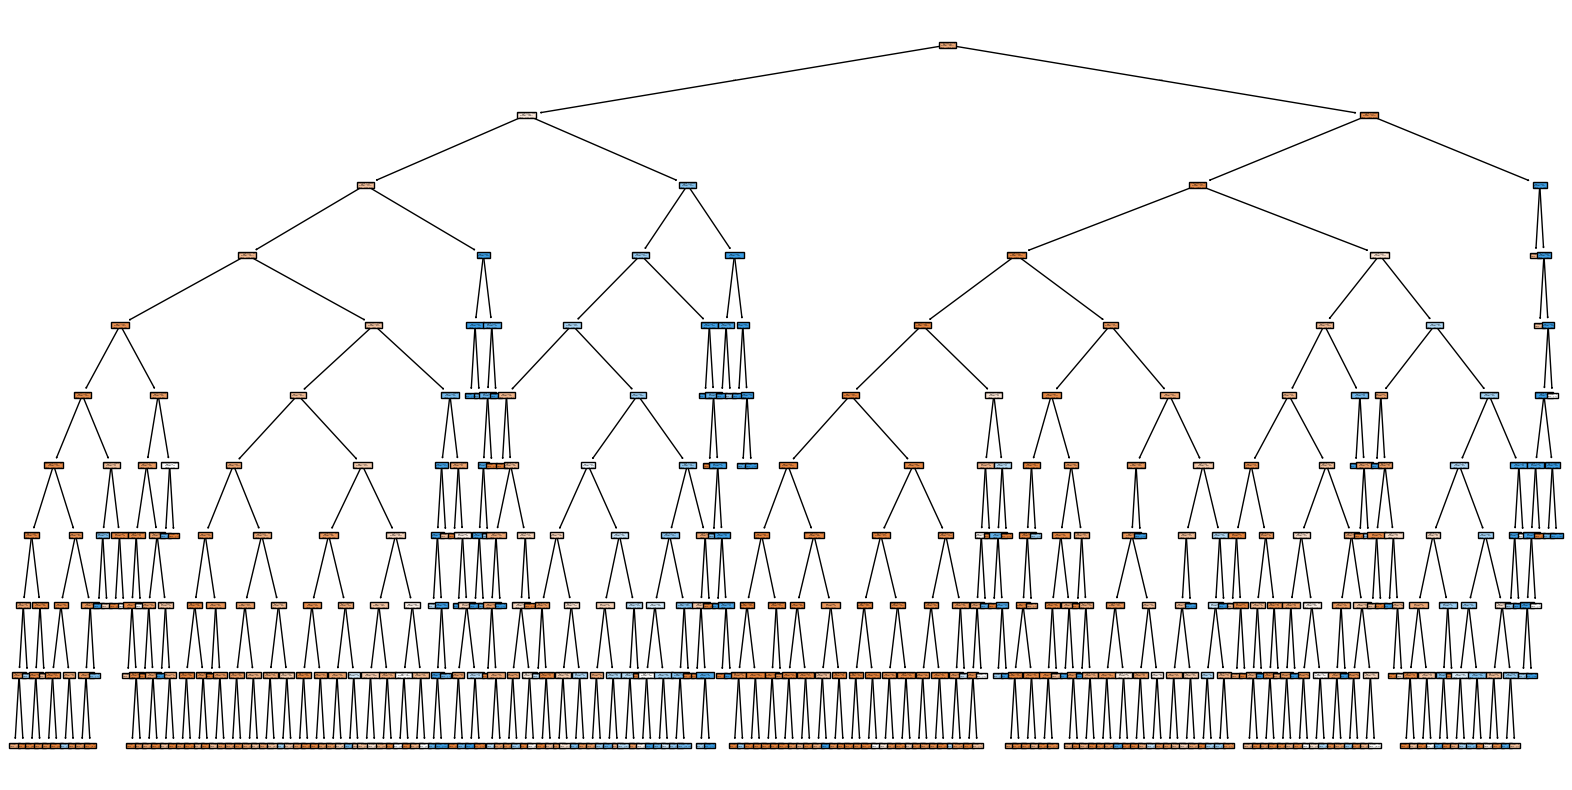

In [117]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt


print("Структура лучшего дерева:")
print(export_text(best_model, feature_names=list(X.columns)))

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, filled=True)
plt.show()

## Имплементация алгоритма машинного обучения

In [ ]:
import numpy as np
import pandas as pd

class CustomDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        self.tree = self._build_tree(self.X, self.y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(set(y)) == 1:
            return {'leaf': True, 'value': y[0]}
        
        if self.max_depth is not None and depth >= self.max_depth:
            return {'leaf': True, 'value': self._most_common_class(y)}
    
        best_split = self._find_best_split(X, y)
        if best_split is None:
            return {'leaf': True, 'value': self._most_common_class(y)}
    
        left_tree = self._build_tree(best_split['left_X'], best_split['left_y'], depth + 1)
        right_tree = self._build_tree(best_split['right_X'], best_split['right_y'], depth + 1)
        
        return {
            'leaf': False,
            'feature_index': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left': left_tree,
            'right': right_tree
        }

    def _find_best_split(self, X, y):
        best_gini = float('inf')
        best_split = None
        
        n_samples, n_features = X.shape
        
        for feature_index in range(n_features):
            sorted_indices = np.argsort(X[:, feature_index])
            sorted_X = X[sorted_indices]
            sorted_y = y[sorted_indices]

            for i in range(1, n_samples):
                # Пропускаем одинаковые значения
                if sorted_X[i-1, feature_index] == sorted_X[i, feature_index]:
                    continue
                
                threshold = (sorted_X[i-1, feature_index] + sorted_X[i, feature_index]) / 2
                
                left_mask = sorted_X[:, feature_index] <= threshold
                right_mask = ~left_mask
                left_y = sorted_y[left_mask]
                right_y = sorted_y[right_mask]
                
                gini = self._calculate_gini(left_y, right_y)
                
                if gini < best_gini:
                    best_gini = gini
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_X': X[left_mask],
                        'left_y': left_y,
                        'right_X': X[right_mask],
                        'right_y': right_y
                    }
        
        return best_split

    def _calculate_gini(self, left_y, right_y):
        def gini_impurity(y):
            class_counts = np.bincount(y)
            total = len(y)
            return 1 - sum((count / total) ** 2 for count in class_counts)
        
        left_gini = gini_impurity(left_y) if len(left_y) > 0 else 0
        right_gini = gini_impurity(right_y) if len(right_y) > 0 else 0
        left_weight = len(left_y) / (len(left_y) + len(right_y))
        right_weight = len(right_y) / (len(left_y) + len(right_y))
        
        return left_weight * left_gini + right_weight * right_gini

    def _most_common_class(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_single(x, self.tree) for x in X])

    def _predict_single(self, x, tree):
        if tree['leaf']:
            return tree['value']
        
        if x[tree['feature_index']] <= tree['threshold']:
            return self._predict_single(x, tree['left'])
        else:
            return self._predict_single(x, tree['right'])


In [119]:
tree = CustomDecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("My decision tree results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

My decision tree results:
Accuracy: 0.763332992117924
F1: 0.004306632213608958


### Выводы

Моя реализация оказалась хуже, чем библиотечные реализации. Причем метрика F1 оказалась драматически низкой.

## Случайный лес
### Создание бейзлайна и оценка качества

In [120]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [150]:
y_pred = clf.predict(X_test)

print("Random forest results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Random forest results:
Accuracy: 0.8644692394308527
F1: 0.6893477240732051


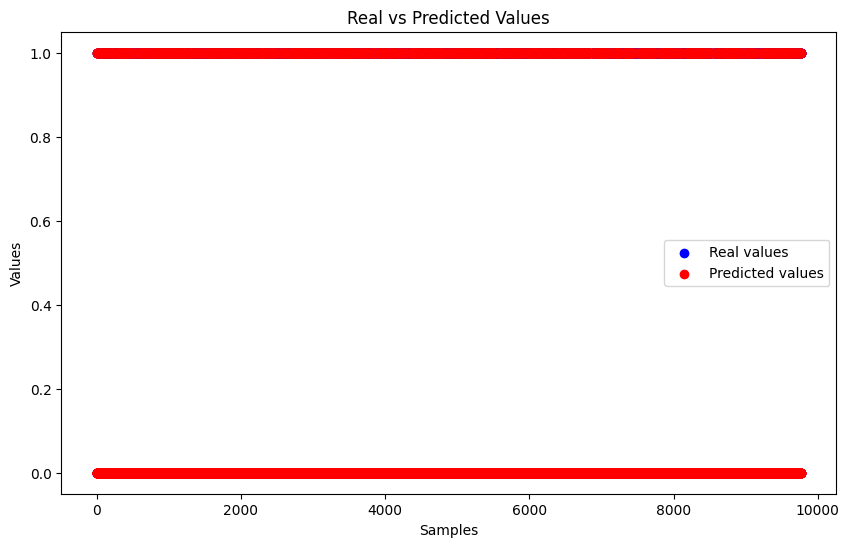

In [153]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

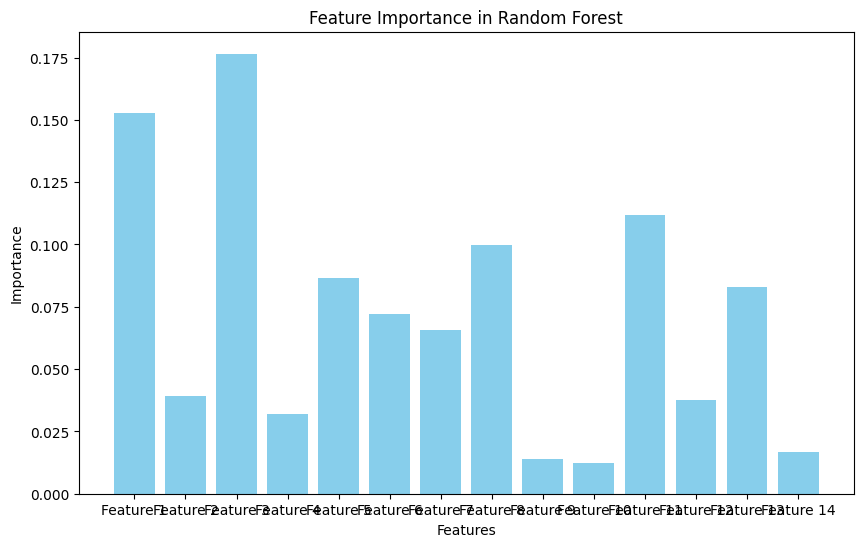

In [154]:
feature_importance = clf.feature_importances_


plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance, color='skyblue')
plt.xticks(range(X.shape[1]), [f'Feature {i+1}' for i in range(X.shape[1])])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

### Улучшение бейзлайна

Для улучшения бейзлайна, подберем наилучшие гиперпараметры

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_sa

In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Imporoved Random forest results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Imporoved Random forest results:
Accuracy: 0.8724536800081891
F1: 0.6990338164251207


### Выводы

Подбор гиперпараметров был довольно длительным. Но результаты порадовали, мы получили улучшение как в метрике accuracy так и в f1.

### Собственная реализация алгоритма машинного обучения

In [135]:
from collections import Counter


class RandomForestClassifierCustom:
    def __init__(self, n_estimators=100, max_depth=None, max_features="sqrt", random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        if self.max_features == "sqrt":
            max_features = int(np.sqrt(n_features))
        elif self.max_features == "log2":
            max_features = int(np.log2(n_features))
        else:
            max_features = n_features
        
        for _ in range(self.n_estimators):
            sample_indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_sample = X.iloc[sample_indices].values
            y_sample = y.iloc[sample_indices].values  

            feature_indices = np.random.choice(n_features, size=max_features, replace=False)
            X_sample = X_sample[:, feature_indices]

            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_sample, y_sample)
            self.trees.append((tree, feature_indices))

    def predict(self, X):
        tree_predictions = []
        for tree, feature_indices in self.trees:
            X_sample = X.iloc[:, feature_indices].values
            tree_pred = tree.predict(X_sample)
            tree_predictions.append(tree_pred)
        
        tree_predictions = np.array(tree_predictions).T
        majority_votes = [Counter(tree_preds).most_common(1)[0][0] for tree_preds in tree_predictions]
        return np.array(majority_votes)


In [136]:
rf = RandomForestClassifierCustom(n_estimators=100, max_depth=10, max_features="sqrt", random_state=42)
rf.fit(X_train, y_train)

In [137]:
y_pred = rf.predict(X_test)
print("Imporoved Random forest results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Imporoved Random forest results:
Accuracy: 0.8150271266250384
F1: 0.3727872266574106


### Выводы

Собственная реализация проигрывает библиотечным функциям

## Градиентный бустинг
### Создание бейзлайна и оценка качества

In [156]:
from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [157]:
y_pred = gb.predict(X_test)

print("Gradient boosting results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Gradient boosting results:
Accuracy: 0.8735796908588391
F1: 0.6957378664695738


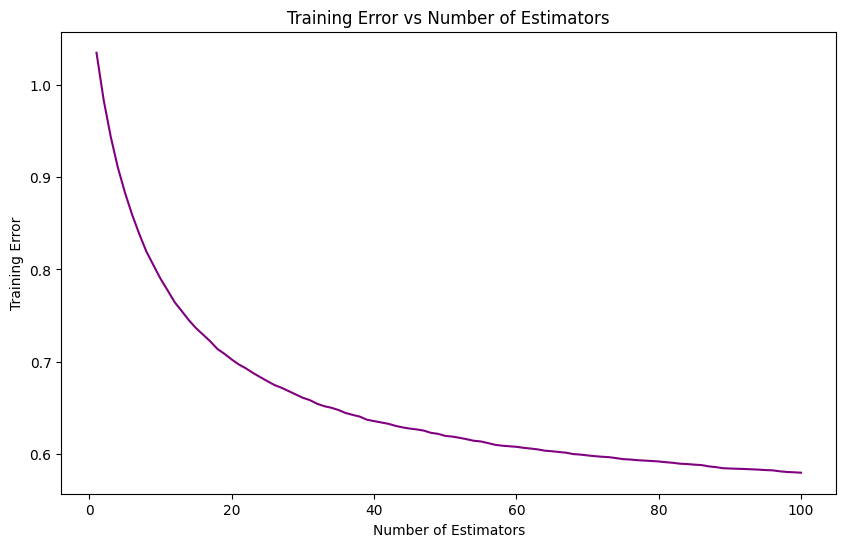

In [160]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(gb.train_score_) + 1), gb.train_score_, color='purple')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Error')
plt.title('Training Error vs Number of Estimators')
plt.show()

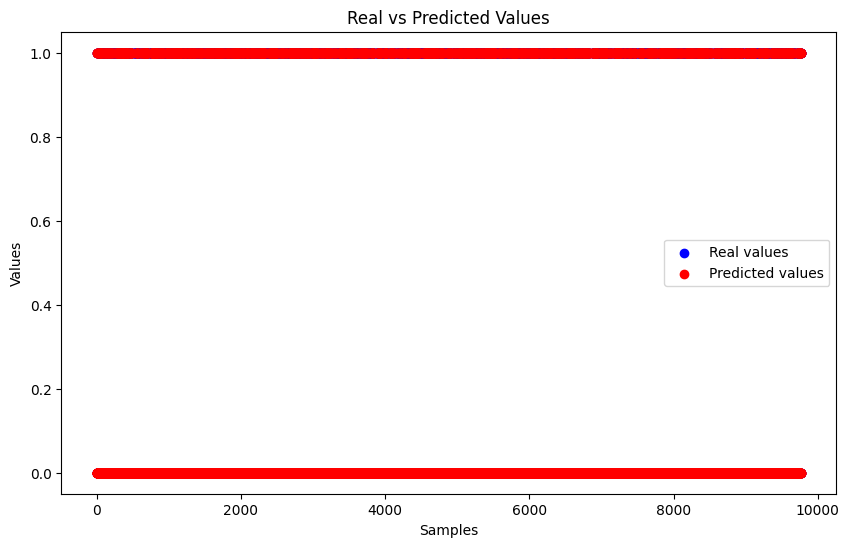

In [161]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

### Улучшение бейзлайна

Попробуем улучшить бейзлайн с помощью подбора гиперпараметров

In [140]:
gb = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],  
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [141]:
y_pred = grid_search.predict(X_test)

print("Gradient boosting results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Gradient boosting results:
Accuracy: 0.8784931927525848
F1: 0.7220791383750877


### Выводы

C помощью подбора гиперпараметров получилось улучшить наши целевые метрики.

### Собственная имплементация алгоритма машинного обучения

In [147]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import log_loss

class GradientBoostingClassifierCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.initial_prediction = None

    def _log_loss(self, y_true, y_pred):
        epsilon = 1e-15  # чтобы избежать ошибок с логарифмами
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon) 
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        self.initial_prediction = np.mean(y)

        F_0 = np.full_like(y, self.initial_prediction, dtype=np.float64)

        for _ in range(self.n_estimators):
            residuals = y - F_0
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)  # Используем регрессор
            tree.fit(X, residuals)
            tree_pred = tree.predict(X)
            F_0 += self.learning_rate * tree_pred
            self.trees.append(tree)

    def predict(self, X):
        F_pred = np.full(X.shape[0], self.initial_prediction, dtype=np.float64)
        for tree in self.trees:
            F_pred += self.learning_rate * tree.predict(X)
        return np.clip(F_pred, 0, 1)

    def score(self, X, y):
        y_pred = self.predict(X)
        return self._log_loss(y, y_pred)


In [148]:
gb_custom = GradientBoostingClassifierCustom(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_custom.fit(X_train, y_train)

y_pred = gb_custom.predict(X_test)

y_pred_binary = (y_pred >= 0.5).astype(int)

print("My Gradient boosting results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_binary)}")
print(f"F1: {f1_score(y_test, y_pred_binary)}")

My Gradient boosting results:
Accuracy: 0.8683590950967346
F1: 0.6707629288274449


### Выводы

Моя реализация оказалась хуже, чем библиотечная, но при этом она все равно показывает довольно высокие результаты.

## Выводы по лабораторным работам
Подведем итоги всех моделей. Выведем сводную таблицу по всем моделям и их метрикам

| **Модель**             | **Тип**              | **Accuracy** | **F1 Score** |
|------------------------|----------------------|--------------|--------------|
| **KNN**               | Бейзлайн             | 0.8206       | 0.5204       |
|                       | Улучшенный бейзлайн  | **0.8427**   | **0.6430**   |
|                       | Своя реализация      | 0.7938       | 0.3952       |
| **Логистическая регрессия** | Бейзлайн        | 0.8084       | 0.4759       |
|                       | Улучшенный бейзлайн  | 0.8154       | 0.5241       |
|                       | Своя реализация      | **0.8212**   | **0.5282**   |
| **Решающее дерево**   | Бейзлайн             | 0.8212       | 0.5282       |
|                       | Улучшенный бейзлайн  | **0.8623**   | 0.5282       |
|                       | Своя реализация      | 0.7633       | 0.0043       |
| **Случайный лес**     | Бейзлайн             | 0.8645       | 0.6893       |
|                       | Улучшенный бейзлайн  | **0.8725**   | **0.6990**   |
|                       | Своя реализация      | 0.8150       | 0.3728       |
| **Градиентный бустинг**| Бейзлайн             | 0.8736       | 0.6957       |
|                       | Улучшенный бейзлайн  | **0.8785**   | **0.7221**   |
|                       | Своя реализация      | 0.8684       | 0.6708       |


### Вывод по результатам:
**KNN:**

Улучшенный бейзлайн значительно повысил как Accuracy (0.8427), так и F1 Score (0.6430) по сравнению с базовым вариантом и собственной реализацией.
Собственная реализация демонстрирует худшие результаты с низкими метриками (Accuracy: 0.7938, F1: 0.3952), что может указывать на ошибки в реализации или недостаточную оптимизацию гиперпараметров.

**Логистическая регрессия:**

Улучшенный бейзлайн немного улучшил метрики по сравнению с базовым вариантом (Accuracy: 0.8154, F1: 0.5241).
Собственная реализация даже превзошла бейзлайн, достигнув Accuracy: 0.8212 и F1: 0.5282, что говорит о корректной реализации.

**Решающее дерево:**

Улучшенный бейзлайн существенно улучшил точность (Accuracy: 0.8623) по сравнению с базовым вариантом, но F1 Score (0.5282) остался неизменным.
Собственная реализация имеет крайне низкий F1 Score (0.0043), что указывает на значительные проблемы, такие как недостаточное разделение классов или ошибки в коде.

**Случайный лес:**

Улучшенный бейзлайн показывает наивысшие метрики (Accuracy: 0.8725, F1: 0.6990), что подтверждает успешную оптимизацию модели.
Собственная реализация имеет значительно худшие метрики (Accuracy: 0.8150, F1: 0.3728), что может быть связано с некорректным использованием гиперпараметров или алгоритма.

**Градиентный бустинг**:

Улучшенный бейзлайн показывает наилучшие результаты среди всех моделей, достигая Accuracy: 0.8785 и F1: 0.7221.
Собственная реализация также показала достойные результаты (Accuracy: 0.8684, F1: 0.6708), уступая улучшенному бейзлайну, но превосходя большинство других моделей.

### Общий вывод:

Лучшей моделью по всем метрикам является улучшенный бейзлайн градиентного бустинга, который показывает наивысшую точность и сбалансированность классов.
Улучшение бейзлайнов во всех моделях дало положительный эффект, особенно в случае дерева решений и случайного леса.

Собственные реализации требуют доработки, особенно для KNN и дерева решений, где они демонстрируют значительно худшие метрики.
Для задач с несбалансированными классами (на что указывает разрыв в F1) важно уделить больше внимания подбору гиперпараметров и анализу данных.